In [14]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [15]:
X=np.array(['Chien','Chat','Oiseau'])

#Fonction utilisee pour l'encodage des XJ

transform=LabelEncoder()

transform.fit(X)

LabelEncoder()

In [16]:
transform.transform(X)

array([1, 0, 2], dtype=int64)

In [66]:

transform.fit_transform(X)


array([1, 0, 2], dtype=int64)

In [35]:

Y=np.array(['Chien','Chat','Oiseau'])

encoder=LabelEncoder()

# On peut utiliser la fonction encoder 
encoder.fit_transform(Y)

array([1, 0, 2], dtype=int64)

In [28]:
#On peut faire l'operation inverse pour avoir unne idee sur les valeurs qualitatives 

val_qualitative=np.array([0,0,1,2])

encoder.inverse_transform(val_qualitative)


array(['Chat', 'Chat', 'Chien', 'Oiseau'], dtype='<U6')

In [6]:
# Pour travailler avec plusieurs dimensions on utilise OrdinalEncoder

X=np.array([ ['Chien','Mouton'],
            ['chevre','Lapin'],
            ['oiseau','perroquet']])

In [68]:

encoder=OrdinalEncoder()

encoder.fit_transform(X) 

array([[0., 1.],
       [1., 0.],
       [2., 2.]])

In [69]:

X=np.array(['Ovin','Bovin','Rampard','Felin'])

#Cette fonction associe chaque colone a une variable qualitative

#On peut compresser la matrice pour optimiser sur lespace (en ignorant les valeurs != 0)

encoder=LabelBinarizer(sparse_output=True)

encoder.fit_transform(X) 


<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [70]:

X=np.array([ ['Chien','Mouton'],
            ['chevre','Lapin'],
            ['oiseau','perroquet']])

#On peut utiliser onHotEncoder qui par defaut compresse la matrice 


encoder=OneHotEncoder()

encoder.fit_transform(X) 

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [7]:
#La normalisation 
    
tab =np.array([[56],[100],[12],[55]])

# Cette fonction permet de normaliser un ensemble de colonnes 

normalisation=MinMaxScaler()

normalisation.fit_transform(tab)


array([[0.5       ],
       [1.        ],
       [0.        ],
       [0.48863636]])

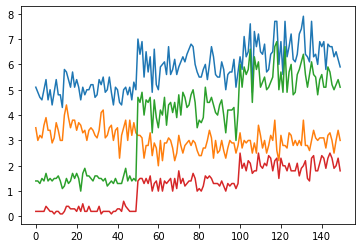

In [76]:
#Avant Normalisation 

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
plt.plot(X)

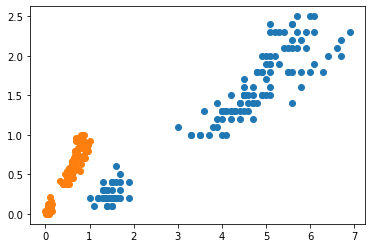

In [77]:
#Apres Normalisation 
X_minmax = MinMaxScaler().fit_transform(X)
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3])

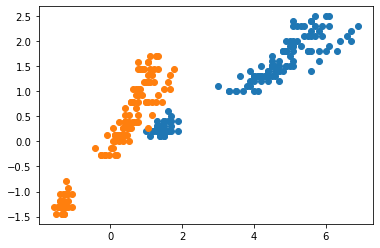

In [41]:
#Cette fonction permet de standariser en utilisant lecart type et la valeur moyenne 

X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])

plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])

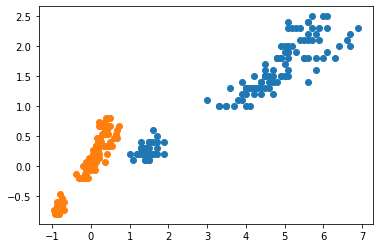

In [72]:
#En presence d'outliers ,il est conseille d'eviter 
#les StandarScaler et MinMaxScaler()
#Dans ce cas on utilise RobustScaler()

X_stdscl = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])

plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])


In [105]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#print(X_train)

scaler=StandardScaler()

#Transformateur

X_transformed=scaler.fit_transform(X_train)

model=SGDClassifier()

#Estimateur

model.fit(X_transformed,y_train)

#model.predict(X_transformed)

X_test_transformed=scaler.fit_transform(X_test)

model.fit(X_test_transformed,y_test)

model.predict(X_test_transformed)

model.score(X_test_transformed,y_test)

#Score en deux temps:estimateur + transformateur 
# =>

0.9

In [98]:
#Le pipeline permet de combiner l'estimateur et le transformateur 
#Sans processing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model.fit(X_train,y_train)

model.score(X_test,y_test)


0.6578947368421053

In [107]:
#Avec Processing

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model=make_pipeline(StandardScaler(),SGDClassifier())

model.fit(X_train,y_train)

model.score(X_test,y_test)

#Score un pierre deux coups:estimateur + transformateur 



0.9736842105263158